<a href="https://colab.research.google.com/github/UmarBalak/TensorFlow-For-Deep-Learning/blob/main/01_01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Regression with Neural Network in TensorFlow**

In [2]:
# import TensorFlow
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
print(tf.__version__)

2.15.0


### **Creating some data to view and fit**


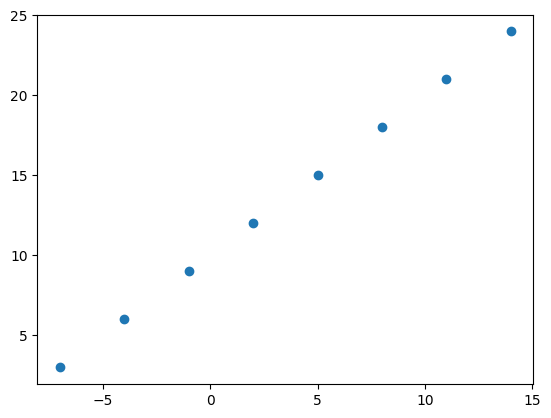

In [4]:
# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [5]:
# Relationship
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### **Input and Output shapes**

In [6]:
# Create a demo tensor for our housing price prewdiction problem

house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
# Turn out our Numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# Input shape and Output shape

input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### **Steps in modeling with TensorFlow**

1. **Creating the model** - define the input layer and the output layer as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = keras.Sequential([
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae, # mae is a short form of mean absolute erre
              optimizer = keras.optimizers.SGD(), # SGD is a short form of Stochastic Gradient Descent
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 8.4355 - mae: 8.4355
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.3030 - mae: 8.3030
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.1705 - mae: 8.1705
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 8.0380 - mae: 8.0380
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.9055 - mae: 7.9055


In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([19.0])
y_pred

1/1 [==============================] - 0s 79ms/step


array([[30.867872]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perheps the **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it for longer) or on more data (give the model more examples to learn from).

In [12]:
# Let's rebuild our model
### Increase the epoch value ###

# 1. Create the model
model = keras.Sequential([
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae,
              optimizer = keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 355ms/step - loss: 12.5837 - mae: 12.5837
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4512 - mae: 12.4512
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3187 - mae: 12.3187
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1862 - mae: 12.1862
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0537 - mae: 12.0537
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9212 - mae: 11.9212
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7887 - mae: 11.7887
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6562 - mae: 11.6562
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5237 - mae: 11.5237
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3912 - mae: 11.3912
Epoch 11/100
1/1 [==============================] -

In [20]:
model.predict([90.0])

1/1 [==============================] - 0s 32ms/step


array([[165.37001]], dtype=float32)

In [16]:
# Let's rebuild our model
# Add 1 more hidden layer

# 1. Create the model
model = keras.Sequential([
    keras.layers.Dense(85, activation = None),
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae,
              optimizer = keras.optimizers.Adam(lr = 0.01),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 80)

Epoch 1/80
1/1 [==============================] - 1s 849ms/step - loss: 13.5310 - mae: 13.5310
Epoch 2/80
1/1 [==============================] - 0s 14ms/step - loss: 13.4367 - mae: 13.4367
Epoch 3/80
1/1 [==============================] - 0s 13ms/step - loss: 13.3422 - mae: 13.3422
Epoch 4/80
1/1 [==============================] - 0s 9ms/step - loss: 13.2477 - mae: 13.2477
Epoch 5/80
1/1 [==============================] - 0s 10ms/step - loss: 13.1531 - mae: 13.1531
Epoch 6/80
1/1 [==============================] - 0s 10ms/step - loss: 13.0584 - mae: 13.0584
Epoch 7/80
1/1 [==============================] - 0s 9ms/step - loss: 12.9636 - mae: 12.9636
Epoch 8/80
1/1 [==============================] - 0s 10ms/step - loss: 12.8687 - mae: 12.8687
Epoch 9/80
1/1 [==============================] - 0s 9ms/step - loss: 12.7737 - mae: 12.7737
Epoch 10/80
1/1 [==============================] - 0s 9ms/step - loss: 12.6786 - mae: 12.6786
Epoch 11/80
1/1 [==============================] - 0s 10ms/ste

In [19]:
model.predict([90.0])

1/1 [==============================] - 0s 110ms/step


array([[165.37001]], dtype=float32)

In [21]:
# Let's rebuild our model
# Add 3 more hidden layers
# 1. Create the model
model = keras.Sequential([
    keras.layers.Dense(50, activation = None),
    keras.layers.Dense(50, activation = None),
    keras.layers.Dense(50, activation = None),
    keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = keras.losses.mae,
              optimizer = keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.2034 - mae: 14.2034
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9301 - mae: 12.9301
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6650 - mae: 11.6650
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2981 - mae: 10.2981
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7059 - mae: 8.7059
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 7.2526 - mae: 7.2526
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2035 - mae: 7.2035
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1539 - mae: 7.1539
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1055 - mae: 7.1055
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1359 - mae: 8.1359
Epoch 11/100
1/1 [==============================] - 0s 11ms/ste

In [22]:
model.predict([30.0])

1/1 [==============================] - 0s 65ms/step


array([[43.6966]], dtype=float32)

### **New Model on new dataset**

In [23]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
y = (2 * X) - 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-210, -202, -194, -186, -178, -170, -162, -154, -146, -138, -130,
       -122, -114, -106,  -98,  -90,  -82,  -74,  -66,  -58,  -50,  -42,
        -34,  -26,  -18,  -10,   -2,    6,   14,   22,   30,   38,   46,
         54,   62,   70,   78,   86,   94,  102,  110,  118,  126,  134,
        142,  150,  158,  166,  174,  182], dtype=int32)>

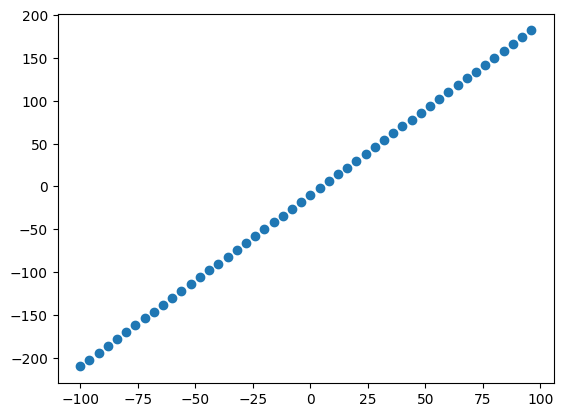

In [25]:
plt.scatter(X, y)

In [26]:
len(X)

50

In [27]:
X_train = X[:40] # 80%
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [28]:
model_1 = keras.Sequential([
    keras.layers.Dense(units = 1, input_shape = [1], activation = 'relu')
])

model_1.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(X_train, y_train, epochs = 50)

Epoch 1/50
2/2 [==============================] - 0s 9ms/step - loss: 92.4237 - mae: 92.4237
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 86.2505 - mae: 86.2505
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 84.3963 - mae: 84.3963
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 81.9732 - mae: 81.9732
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 79.2703 - mae: 79.2703
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 76.8398 - mae: 76.8398
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 75.4005 - mae: 75.4005
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 74.0749 - mae: 74.0749
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 73.1445 - mae: 73.1445
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 72.9231 - mae: 72.9231
Epoch 11/50
2/2 [==============================] - 0s 6ms/step - loss

In [ ]:
# New model (increase epochs)
model_2 = keras.Sequential([
    keras.layers.Dense(units = 1, input_shape = [1], activation = 'relu')
])

model_2.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.SGD(),
    metrics = ['mae']
)

model_2.fit(X_train, y_train, epochs = 500)

In [ ]:
# New model (add extra hidden layer)

model_3 = keras.Sequential([
    keras.layers.Dense(units = 64, input_shape = [1], activation = 'relu'),
    keras.layers.Dense(units = 1)
])

model_3.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.SGD(),
    metrics = ['mae']
)

model_3.fit(X_train, y_train, epochs = 500)

In [ ]:
# New model (change the optimizer)

model_4 = keras.Sequential([
    keras.layers.Dense(units = 64, input_shape = [1], activation = 'relu', name = 'input_layer'),
    keras.layers.Dense(units = 1, name = 'output_layer')
], name = 'model_NO_4')

model_4.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.Adam(),
    metrics = ['mae']
)

model_4.fit(X_train, y_train, epochs = 500)

In [ ]:
model_4.summary()

Model: "model_NO_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


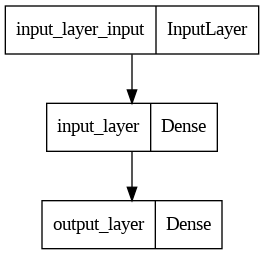

In [ ]:
plot_model(model = model_4)

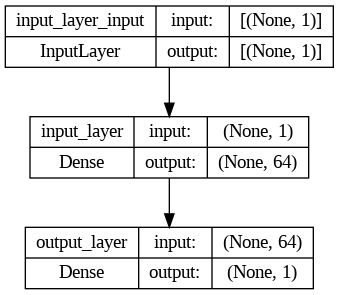

In [ ]:
plot_model(model = model_4, show_shapes = True)

In [ ]:
#Let's make predictions on our test data
y_preds = model_4.predict(X_test).flatten()
y_preds

1/1 [==============================] - 0s 117ms/step


array([106.944664, 114.37005 , 121.79543 , 129.22081 , 136.64622 ,
       144.0716  , 151.4968  , 158.92137 , 166.34593 , 173.77048 ],
      dtype=float32)

In [ ]:
# Let's make a DataFrame to compare our prediction with the ground truth

df_predictions = pd.DataFrame({'Ground_Truth': y_test, 'Model_prediction': y_preds}, columns=['Ground_Truth', 'Model_prediction'])
df_predictions['Model_prediction'] = df_predictions['Model_prediction'].astype(int)

In [ ]:
df_predictions

,Ground_Truth,Model_prediction
0,110,106
1,118,114
2,126,121
3,134,129
4,142,136
5,150,144
6,158,151
7,166,158
8,174,166
9,182,173


In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds
                     ):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
  plt.scatter(test_data, test_labels, c='g', label = 'Test data')
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
  plt.legend()

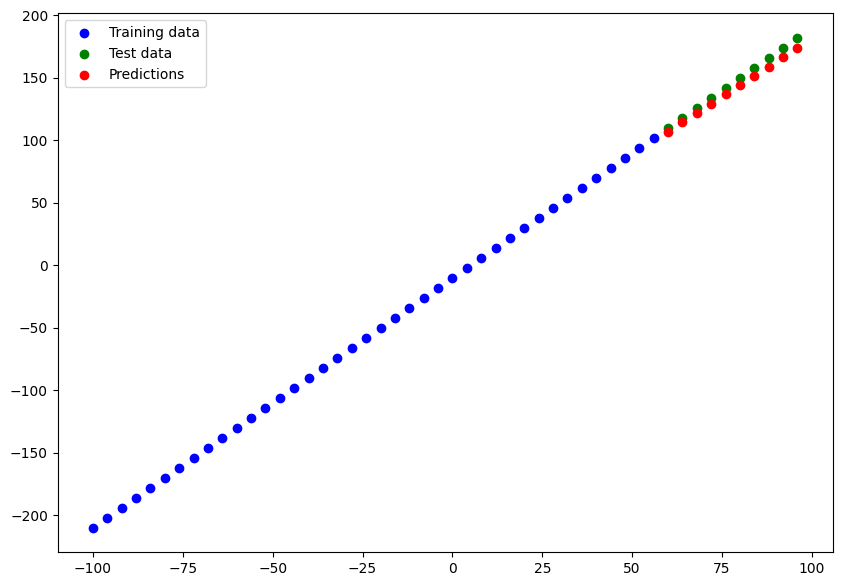

In [ ]:
plot_predictions()

In [ ]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 1s 538ms/step - loss: 5.6417 - mae: 5.6417


[5.641664981842041, 5.641664981842041]

In [ ]:
mae = keras.losses.MAE(y_test, y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.641665>

In [ ]:
mse = keras.losses.MSE(y_test, y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=34.554802>

### **Large Example**

In [29]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [30]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance, drop_first = True)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [32]:
# Splitting into X and y
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [33]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [44]:
# Check data types
print(X_train.dtypes)
print(y_train.dtypes)

# Convert data types if necessary
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object
float64


In [45]:
tf.random.set_seed(42)

insurance_model = keras.Sequential([
    keras.layers.Dense(units = 100, input_shape = [len(X.columns)], activation = 'linear'),
    keras.layers.Dense(units = 100, activation = 'linear'),
    keras.layers.Dense(units = 1, activation = 'linear'),
])

insurance_model.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.Adam(),
    metrics = ['mae']
)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13057.8574 - mae: 13057.8574
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12350.8193 - mae: 12350.8193
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 10349.3184 - mae: 10349.3184
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7885.4746 - mae: 7885.4746
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7360.4463 - mae: 7360.4463
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7319.2603 - mae: 7319.2603
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7270.5078 - mae: 7270.5078
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7238.1479 - mae: 7238.1475
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7193.2998 - mae: 7193.2998
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7146.4863 - mae: 714

In [46]:
# Normalize the data (0 to 1) for better accuracy

# Create a scaler object
scaler = MinMaxScaler()
# Fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

X_norm.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,0.505232,0.204783,0.242900,0.272048,0.242900
std,0.305434,0.164062,0.241099,0.500160,0.403694,0.428995,0.445181,0.428995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# Create training and test sets with the normalized data (X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 10)

In [48]:
tf.random.set_seed(42)

insurance_model_2 = keras.Sequential([
    keras.layers.Dense(units = 100, input_shape = [len(X.columns)], activation = 'relu'),
    keras.layers.Dense(units = 50, activation = 'relu'),
    keras.layers.Dense(units = 25, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'relu'),
])

insurance_model_2.compile(
    loss = keras.losses.mae,
    optimizer = keras.optimizers.Adam(),
    metrics = ['mae']
)

history_2 = insurance_model_2.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13199.2500 - mae: 13199.2500
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13194.1953 - mae: 13194.1953
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13162.4805 - mae: 13162.4805
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 13031.5098 - mae: 13031.5098
Epoch 5/500
34/34 [==============================] - 0s 8ms/step - loss: 12656.7891 - mae: 12656.7891
Epoch 6/500
34/34 [==============================] - 0s 8ms/step - loss: 11823.7480 - mae: 11823.7480
Epoch 7/500
34/34 [==============================] - 0s 7ms/step - loss: 10441.1484 - mae: 10441.1484
Epoch 8/500
34/34 [==============================] - 0s 5ms/step - loss: 8909.2549 - mae: 8909.2549
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7889.0161 - mae: 7889.0161
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7487.0654 - 

Text(0.5, 0, 'Epochs')

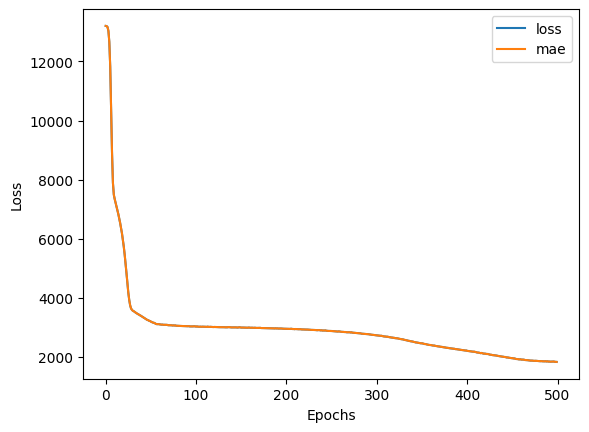

In [49]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('Loss')
plt.xlabel("Epochs")

In [50]:
print("The End")

The End
